In [74]:
%load_ext autoreload
%autoreload 2

from lib import *

Torch device: cuda:0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
train_loader,test_loader = get_dataloaders(64)

In [38]:
cnn,test_accs,train_accs = train_network(ConvNet(),train_loader,test_loader,epochs=15)

Finished Training
Test Accuracy=98.850
Train Accuracy=98.850


In [39]:
viz = ModelVisualizer(cnn, (1,1,28,28), torch.device('cuda'))

Torch device: cuda:0


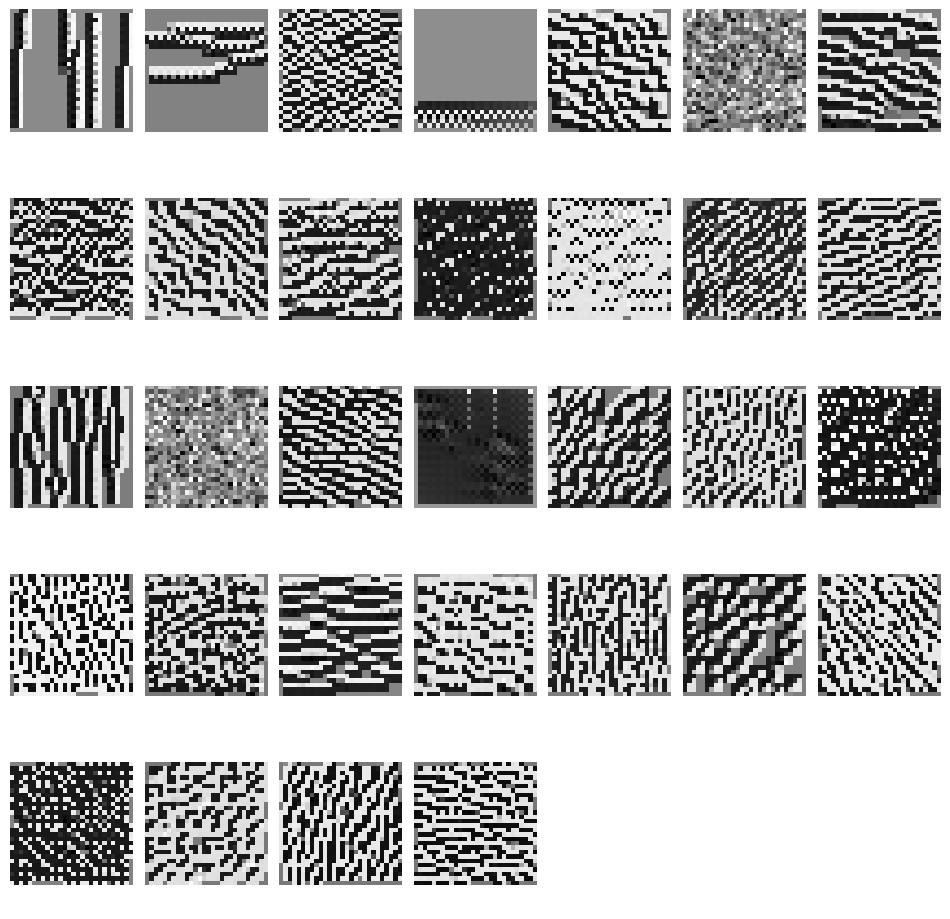

In [40]:
l1_patterns = [
    viz.optimize_input(
        layer_no=0,
        target_index=i
    ).cpu().detach().reshape((28,28)) for i in range(32)
]
show_images(l1_patterns)

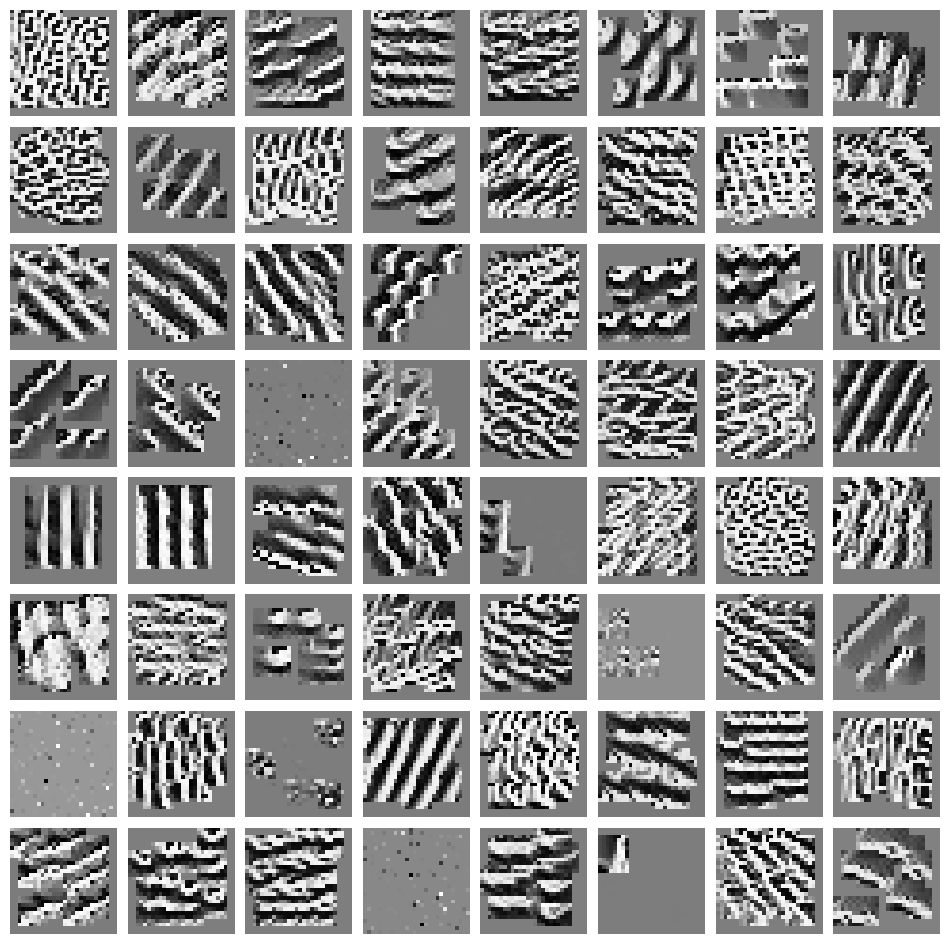

In [41]:
l2_patterns = [
    viz.optimize_input(
        layer_no=1,
        target_index=i,
        epochs=5000,
        lr=1.
    ).cpu().detach().reshape((28,28)) for i in range(64)
]
show_images(l2_patterns)

Torch device: cuda:0


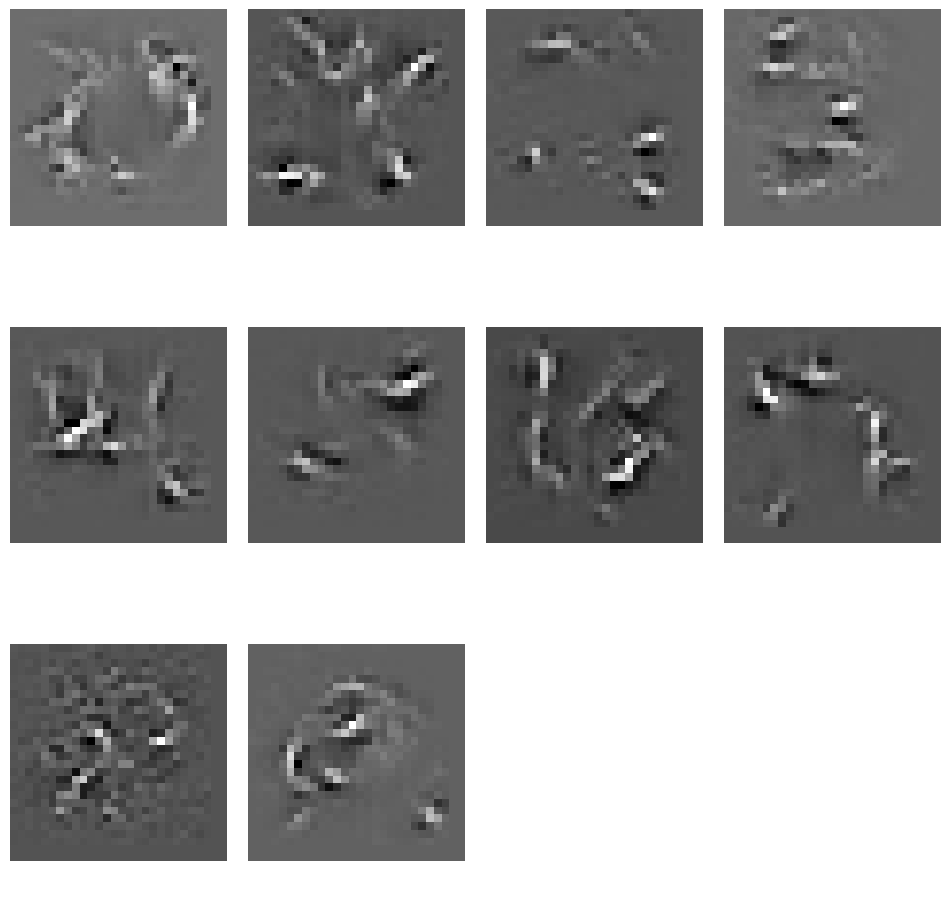

In [47]:
l3_patterns = [
    viz.optimize_input(
        layer_no=2,
        target_index=i,
        epochs=10000
    ).cpu().detach().reshape((28,28)) for i in range(10)
]
show_images(l3_patterns)

In [43]:
print(train_loader.batch_size)

64


tensor(9)
tensor([9], device='cuda:0')


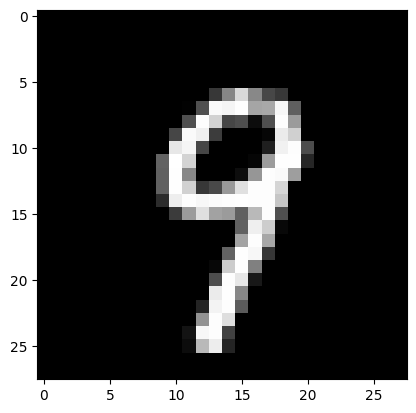

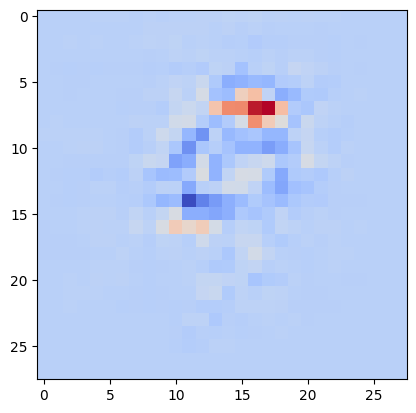

In [161]:
sample_imgs, sample_labels = next(iter(train_loader))
print(sample_labels[0])
print(torch.max(viz.model(sample_imgs[0].to(DEVICE).reshape(1,1,28,28)), dim=1)[1])
slc = viz.get_saliency(sample_imgs[0].reshape(1,1,28,28))
plt.imshow(sample_imgs[0].reshape((28,28)),cmap='gray')
plt.show()
plt.imshow(slc.reshape((28,28)),cmap='coolwarm')
plt.show()